# Radial Basis Functions (RBFs)

Write code to plot all of the $K=101$ basis functions $\phi_{k}(x)$ with $h=0.2$. Don't plot the data of f(x) functions

Note: All of this code is written by myself but I used CoPilot to generate documentation and Type Hints

In [89]:
#Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [90]:
#Define our functions
def my_rbf(h: float, x: float, c: float) -> float:
    """
    Computes the Radial Basis Function (RBF) value for given inputs.

    Args:
        h (float): The bandwidth parameter.
        x (float): The input value.
        c (float): The center value.

    Returns:
        float: The computed RBF value.
    """
    return np.exp((-(x-c)**2)/(h**2))

def rbf_centres_array(h: float, number_of_features: int) -> np.ndarray:
    """
    Calculate the center array for a given number of features and spacing.

    Args:
        h (float): The spacing between the centers.
        number_of_features (int): The total number of features.

    Returns:
        np.ndarray: An array of center positions.
    """
    return((np.arange(1, number_of_features+1) - ((number_of_features // 2)+1)) * h) / np.sqrt(2)

def sigma(h: float):
    """
    Calculate the sigma value given h.

    Parameters:
    h (float): The input value.

    Returns:
    float: The calculated sigma value, which is h divided by the square root of 2.
    """
    return h / np.sqrt(2)

def sigma_limits(number_of_features: int):
    """
    Calculate the sigma limits based on the number of features (i.e. the x coordinate of the outermost RBFs in terms of sigma)

    Parameters:
    number_of_features (int): The total number of features.

    Returns:
    tuple: A tuple containing the lower and upper sigma limits where sigma limits
    """
    return (1-((number_of_features // 2)+1),number_of_features-((number_of_features // 2)+1))

def plotting_x_values(h: float, number_of_features: int, grid_size: float) -> np.ndarray:
    """
    Generate an array of x values based on the given parameters.

    Parameters:
    h (float): A parameter used to calculate sigma (standard deviation).
    number_of_features (int): The number of features to determine sigma limits.
    grid_size (float): The step size for the range of x values.

    Returns:
    numpy.ndarray: An array of x values ranging from (sigma_limits[0] - 10) * sigma to (sigma_limits[1] + 10) * sigma with steps of grid_size.
    """
    my_sigma_limits: tuple[int, int] = sigma_limits(number_of_features)
    my_sigma: float = sigma(h)
    return np.arange(((my_sigma_limits[0] - 10) * my_sigma), (my_sigma_limits[1] + 10) * my_sigma, grid_size)


In [91]:
def generate_and_plot_rbfs(my_h: float, my_number_of_features: int, x_grid: float) -> None:
    """
    Generates and plots Radial Basis Functions (RBFs).

    Parameters:
    my_h (float): The bandwidth parameter for the RBFs.
    my_number_of_features (int): The number of RBF features to generate.
    x_grid (float): The grid size for x values over which to evaluate the RBFs.

    Returns:
    None: This function does not return any value. It generates a plot of the RBFs.

    Notes:
    - The function first generates the centres and x values for the RBFs.
    - It then computes the y values for the RBFs.
    - A colormap is retrieved and used to color the RBF plots.
    - Finally, the function plots each RBF with a unique color and displays the plot.
    """

    my_centres = rbf_centres_array(my_h, my_number_of_features)

    my_x_values = plotting_x_values(my_h, my_number_of_features, x_grid)

    #(2000,100) (n*p) array of y values where each row is the 100 rbf functions 
    my_y_values = my_rbf(my_h, my_x_values[:, np.newaxis], my_centres)

    # Retrieve the colormap
    colormap = plt.colormaps['magma']  # 'coolwarm' transitions from red to blue

    # Generate a colormap
    colors = colormap(np.linspace(0, 1, my_number_of_features))
    plt.clf()
    plt.xlim([-3, 3])


    for i in range(my_number_of_features):
        plt.plot(my_x_values, my_y_values[:, i], '-', color=colors[i])
    plt.show()


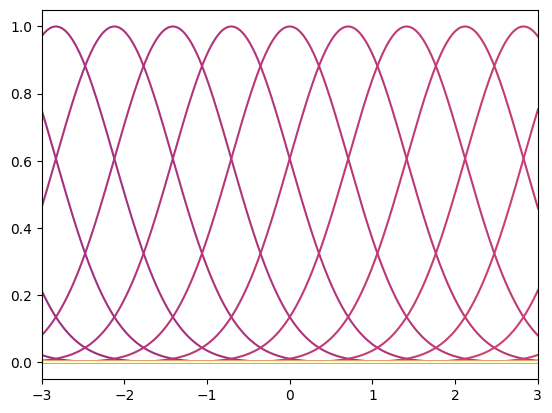

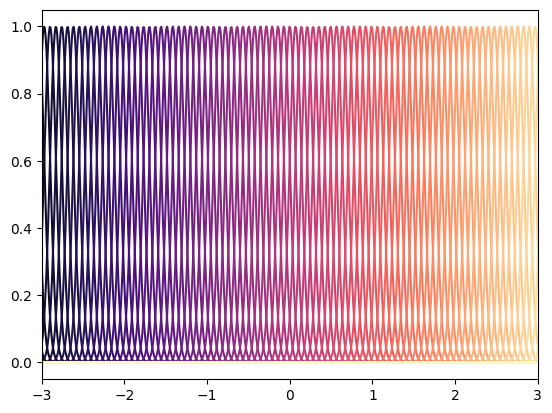

In [92]:
#Generate and plot our RBFs for our chosen h

generate_and_plot_rbfs(my_h=1, my_number_of_features=101, x_grid=0.01)
generate_and_plot_rbfs(my_h=0.1, my_number_of_features=101, x_grid=0.01)

In [93]:
def data_generator(number_of_samples: int, x_limits: tuple[float, float], y_limits: tuple[float, float]) -> np.ndarray:
    """
    Generates a dataset of random samples within specified limits.

    Parameters:
    number_of_samples (int): The number of samples to generate.
    x_limits (tuple): A tuple containing the lower and upper bounds for the x-values.
    y_limits (tuple): A tuple containing the lower and upper bounds for the y-values.

    Returns:
    np.ndarray: A 2D array where the first row contains the sorted x-values and the second row contains the y-values.
    """
    my_rng = np.random.default_rng()
    x_data = np.sort(my_rng.uniform(x_limits[0], x_limits[1], number_of_samples))
    y_data = my_rng.uniform(y_limits[0], y_limits[1], number_of_samples)
    return np.vstack((x_data, y_data))

    #Currently refactored up to here


In [94]:
def fitted_function(x, fitted_rbf_weights, centre_array):
    return np.dot(fitted_rbf_weights, my_rbf(x, centre_array))

In [99]:
def regularized_rbf_regression(h: float, number_of_features: int, regularizing_param: float, x_data: np.ndarray, y_data: np.ndarray) -> np.ndarray:
    """
    Perform regularized Radial Basis Function (RBF) regression.

    Parameters:
    h (float): The bandwidth parameter for the RBF.
    number_of_features (int): The number of RBF features to use.
    regularizing_param (float): The regularization parameter.
    x_data (numpy.ndarray): The input data array of shape (n_samples,).
    y_data (numpy.ndarray): The target data array of shape (n_samples,).

    Returns:
    numpy.ndarray: The weights of the RBF regression model.
    """
    centres = rbf_centres_array(h, number_of_features)
    phi_features = my_rbf(h, x_data[:, np.newaxis], centres)
    regularizing_matrix = np.sqrt(regularizing_param) * np.eye(number_of_features)
    augmented_y_values = np.hstack((y_data, np.zeros(number_of_features)))
    augmented_feature_values = np.vstack((phi_features, regularizing_matrix))
    fitted_RBF_regression_weights = np.linalg.lstsq(augmented_feature_values, augmented_y_values, rcond=None)[0]
    def fitted_regression_function(x):
        return np.dot(fitted_RBF_regression_weights, my_rbf(h, x, centres))
    return fitted_regression_function

In [ ]:
def generate_data_plot_rbf_regression(regression_function, plotting_x_data_limits, training_x_data, training_y_data, grid_size=0.01):
#Generate data to plot graph:
   graph_x_data = np.arange(plotting_x_data_limits[0], plotting_x_data_limits[1],grid_size)

   #Function values for those data points:
   graph_function_data = np.vectorize(regression_function)(graph_x_data)

   sample_size = len(training_x_data)

   plt.clf()
   plt.plot(training_x_data, training_y_data, 'x')
   ## Add labels to data points
   for i in range(1, sample_size, sample_size // 5):
      plt.text(training_x_data[i], training_y_data[i], f'({training_x_data[i]:.2f}, {training_y_data[i]:.2f})', fontsize=8, ha='right')
   plt.plot(graph_x_data, graph_function_data, '-r')
   plt.show()


In [106]:
#Need to fix from here onwards and fix the other file

#Choose the data parameters you want to sample from
data = data_generator(70, (-1,1,), (-1,1))
x_data = data[0]
y_data = data[1]
my_h = 0.1
my_number_of_features = 101
my_regularizer = 0.1

my_regression_function = regularized_rbf_regression(my_h, my_number_of_features, my_regularizer, x_data, y_data)



plt.clf()
plt.plot(my_new_x_data, my_new_y_data, 'x')
## Add labels to data points
for i in range(1, my_new_sample_size, 5):
   plt.text(my_new_x_data[i], my_new_y_data[i], f'({my_new_x_data[i]:.2f}, {my_new_y_data[i]:.2f})', fontsize=8, ha='right')
plt.plot(new_graph_x_data, new_graph_function_data, '-r')
plt.show()

[-2.6359654349682523e-06, -4.121357797669597e-06, -6.368843561687354e-06, -9.726924453744436e-06, -1.4681161445042311e-05, -2.1897231042598655e-05, -3.227254555778886e-05, -4.699587714014392e-05, -6.761312980290191e-05, -9.609566033559208e-05, -0.00013490542102837058, -0.0001870488729484713, -0.0002561094408507089, -0.00034624674847123923, -0.0004621505987267876, -0.000608939277782294, -0.0007919957663464409, -0.0010167420321293965, -0.0012883604816275212, -0.0016114820258997568, -0.001989870663045937, -0.002426143179738355, -0.002921567536892869, -0.003475982870819636, -0.004087876333959564, -0.004754636252516489, -0.005472976813042787, -0.00623949660281616, -0.007051292052398202, -0.007906497982242855, -0.00880457316761021, -0.009746093776373673, -0.010731770422407836, -0.011760379436331132, -0.012825315304944105, -0.01390955233203631, -0.014978972049886536, -0.01597428363917229, -0.01680213568722754, -0.017326461259586604, -0.01736155457998309, -0.016668754466255296, -0.014958791599

If we fit data with y values in [1000,1010] but don't add a regularizer, we see below that we can fit the training data by letting the weights become massive - if the number of RBFs is small we will get a massive RBF that goes through the pointsin a straight line (roughly, versus size of the largest point on the graph)

If the number if RBFs is large we will overfit and have a function that is close to zero at some point in between the training data points

(300,)


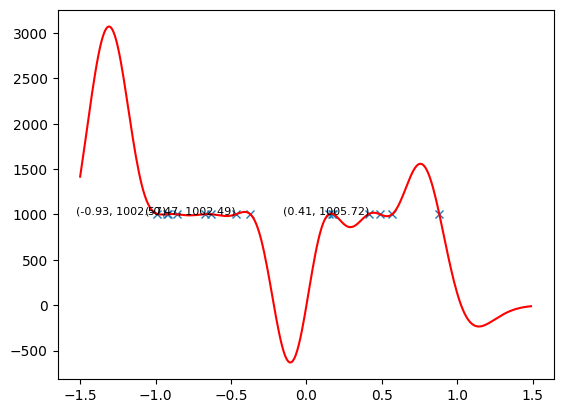

In [153]:
#generate 70 x label input data in [-1,1]
my_rng = np.random.default_rng()

my_sample_size = 15

my_x_data = np.sort(my_rng.uniform(-1,1,my_sample_size))

my_y_data = my_rng.uniform(1000,1010, my_sample_size)

phi_feature_values = my_rbf(my_x_data[:, np.newaxis], my_centres)
#print(phi_feature_values.shape)



#Fit weights using np.linalg.lstsq
fitted_weights = np.linalg.lstsq(phi_feature_values, my_y_data, rcond=None)[0]
#for weight in fitted_weights:
 #   print(f"{weight:.1f}")

#Plot the function we get
def fitted_function(x):
    return np.dot(fitted_weights, my_rbf(x, my_centres))

#Generate data to plot graph:
graph_x_data = np.arange(-1.5,1.5, 0.01)
print(graph_x_data.shape)

#Function values for those data points:
graph_function_data = [fitted_function(x) for x in graph_x_data]



plt.clf()
plt.plot(my_x_data, my_y_data, 'x')
# Add labels to data points
for i in range(1, my_sample_size, 5):
    plt.text(my_x_data[i], my_y_data[i], f'({my_x_data[i]:.2f}, {my_y_data[i]:.2f})', fontsize=8, ha='right')
plt.plot(graph_x_data, graph_function_data, '-r')
plt.show()


We can add a regularizer to the problem with inputs in [1000,1010] to limit the weights but we see that what ends up happening is a bias towards 1000 (lower values):

(116, 101)


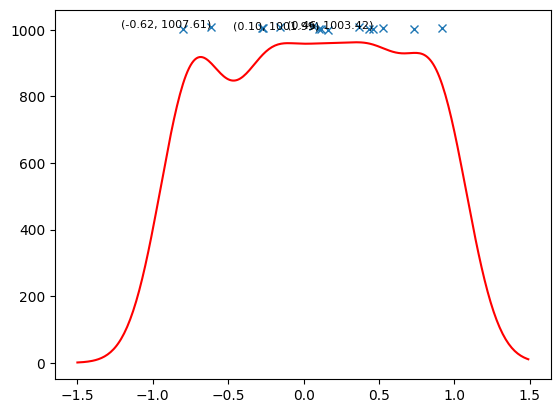

In [154]:
#Unscaled but regularized

#generate 70 x label input data in [-1,1]
my_unscaled_reg_rng = np.random.default_rng()

my_unscaled_regularizer = 0.5

my_unscaled_reg_sample_size = 15

my_unscaled_reg_x_data = np.sort(my_unscaled_reg_rng.uniform(-1,1,my_unscaled_reg_sample_size))

my_unscaled_reg_y_data = my_unscaled_reg_rng.uniform(1000,1010, my_unscaled_reg_sample_size)

my_unscaled_reg_phi_feature_values = my_rbf(my_unscaled_reg_x_data[:, np.newaxis], my_centres)

unscaled_regularizing_matrix = np.sqrt(my_unscaled_regularizer)*np.eye(number_of_features)

unscaled_augmented_y_values = np.hstack((my_unscaled_reg_y_data, np.zeros(number_of_features)))

unscaled_reg_augmented_feature_values = np.vstack((my_unscaled_reg_phi_feature_values,unscaled_regularizing_matrix))
print(augmented_feature_values.shape)




#Fit weights using np.linalg.lstsq
unscaled_reg_fitted_weights = np.linalg.lstsq(unscaled_reg_augmented_feature_values, unscaled_augmented_y_values, rcond=None)[0]
#for weight in fitted_weights:
#    print(f"{weight:.1f}")

#Plot the function we get
def fitted_function(x):
    return np.dot(unscaled_reg_fitted_weights, my_rbf(x, my_centres))

#Generate data to plot graph:
unscaled_reg_graph_x_data = np.arange(-1.5,1.5, 0.01)

#Function values for those data points:
unscaled_reg_graph_function_data = [fitted_function(x) for x in unscaled_reg_graph_x_data]



plt.clf()
plt.plot(my_unscaled_reg_x_data, my_unscaled_reg_y_data, 'x')
# Add labels to data points
for i in range(1, my_unscaled_reg_sample_size, 5):
    plt.text(my_unscaled_reg_x_data[i], my_unscaled_reg_y_data[i], f'({my_unscaled_reg_x_data[i]:.2f}, {my_unscaled_reg_y_data[i]:.2f})', fontsize=8, ha='right')
plt.plot(unscaled_reg_graph_x_data, unscaled_reg_graph_function_data, '-r')
plt.show()